In [2]:
import pandas as pd
import numpy as np
import os
import csv

In [3]:
os.chdir('/Users/shivangisinha/Downloads')

In [23]:
def import_data(filname):
    df = pd.read_csv(filname)
    return df

def normalize_df(df):
    for column in df:
        if (df[column].name == 'dummy'):
            continue
        if (df[column].dtype == np.int64 or df[column].dtype == np.float64):
            df[column] = (df[column]- min(df[column]))/(max(df[column] - min(df[column])))
    return df  


In [171]:
train= import_data("PA1_train.csv")
validate = import_data("PA1_dev.csv")
test = import_data("PA1_test.csv")

In [172]:
def preprocessing(df,normalize = False,train = False,test = False):
    # Part a)
    del df['id']
    # Part b)
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    #df['year'] = pd.to_datetime(df['year'])
    #df['month'] = pd.to_datetime(df['month'])
    #df['day'] = pd.to_datetime(df['day'])
    del df['date']
    # Changing data types
    if train == True:
        df['waterfront'] = df['waterfront'].astype('category')
        df['condition'] = df['condition'].astype('category')
        df['grade'] = df['grade'].astype('category')
    
    # Making tables for numerical features
        name = []
        mean = []
        sd =[]
        ranges = []
        for column in df:
            i=[]
            m=[]
            s=[]
            r=[]
            if (df[column].name == 'dummy'):
                continue
            if (df[column].dtype == np.int64 or df[column].dtype == np.float64):
            
                i = df[column].name
                m = df[column].mean()
                s = df[column].std()
                r = df[column].max() - df[column].min()
                name.append(i)   
                mean.append(m)
                sd.append(s)
                ranges.append(r)
        table = pd.DataFrame({'Name' : name,'Mean':mean,'Standard Deviation' :sd,'Range' : ranges})
        table.to_csv("table123.csv")
    #print(table.head())
    # For categorical features 

        df2 = pd.DataFrame()    
        for column in df.select_dtypes(include=['category']):
            lab = len(df[column].unique())
            freq_v = list(((df[column].value_counts()/len(df[column]))*100)[0:lab])
            labels = df[column].unique()
            #df_v = df_v.sort_index()
            name = [df[column].name for i in range(0,lab)]
            df_v = pd.DataFrame({'Name': name,'Categories': labels,'Freq': freq_v})
            df2 = df2.append(df_v)
        df2.to_csv("cat123.csv")
        
        df['waterfront'] = df['waterfront'].astype('float64')
        df['condition'] = df['condition'].astype('float64')
        df['grade'] = df['grade'].astype('float64')
        
    # normalize
    def normal(data):
        cols = list(data.select_dtypes(include = 'number'))
        for i in range(0,len(cols)):
            col_range = data[cols[i]].max() - data[cols[i]].min()
            if col_range != 0:
                data[cols[i]] = (data[cols[i]] - data[cols[i]].min()) / col_range
        return data
            
    if normalize == True:
        df = normal(df)
    
    if test == False:
        y = df.loc[:,['price']]
        x = df.drop(['price'],axis=1)
        return x,y    
    return df

In [173]:
X_train,Y_train= preprocessing(train,True)
X_validation,Y_validation = preprocessing(validate,True)
X_test = preprocessing(test,True,False,True)

In [22]:
X_train

,dummy,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,1,0.09375,0.275862,0.246849,0.005715,0.4,0.0,0.00,0.50,0.555556,...,0.773913,0.000000,0.368687,0.761782,0.394979,0.400000,0.011601,0.0,0.545455,0.266667
1,1,0.03125,0.275862,0.234244,0.002682,0.0,0.0,0.00,1.00,0.444444,...,0.226087,0.000000,0.631313,0.683127,0.112971,0.318584,0.004985,0.0,0.545455,0.566667
2,1,0.12500,0.172414,0.134454,0.001471,0.2,0.0,0.00,0.50,0.444444,...,0.017391,0.000000,0.722222,0.707093,0.174059,0.226549,0.003837,0.0,0.545455,0.200000
3,1,0.09375,0.172414,0.141807,0.005469,0.0,0.0,0.00,0.75,0.444444,...,0.600000,0.000000,0.292929,0.515522,0.300418,0.212389,0.011556,1.0,0.272727,0.900000
4,1,0.15625,0.241379,0.363445,0.006426,0.0,0.0,0.50,1.00,0.555556,...,0.539130,0.000000,0.035354,0.690043,0.335565,0.361062,0.011188,0.0,0.727273,0.100000
5,1,0.09375,0.275862,0.193277,0.128688,0.0,0.0,0.00,0.75,0.333333,...,0.652174,0.000000,0.186869,0.398906,0.446862,0.320354,0.059787,1.0,0.090909,0.766667
6,1,0.06250,0.275862,0.234244,0.013805,0.2,1.0,1.00,0.50,0.444444,...,0.104348,0.000000,0.732323,0.553000,0.112971,0.219469,0.016128,1.0,0.181818,0.933333
7,1,0.09375,0.137931,0.089286,0.002622,0.0,0.0,0.00,0.50,0.222222,...,0.365217,0.000000,0.590909,0.600450,0.205021,0.168142,0.002688,0.0,0.909091,0.400000
8,1,0.06250,0.310345,0.280462,0.014308,0.4,0.0,0.00,0.75,0.666667,...,0.756522,0.000000,0.166667,0.892553,0.241841,0.408850,0.005822,0.0,0.636364,0.400000
9,1,0.03125,0.068966,0.067227,0.002930,0.0,0.0,0.00,0.75,0.222222,...,0.226087,0.000000,0.156566,0.353868,0.230962,0.092035,0.008202,1.0,0.363636,0.100000


In [954]:
def one_hot(a, num_classes):
    return np.squeeze(np.eye(num_classes)[(a-min(a)).reshape(-1)])

#def make_dummies(df):
    #b = np.empty((10000,22))
    #for column in df.select_dtypes(include=['category']):
            #arr = np.array( df[column])
            #classes =len(np.unique(arr))
            #a = one_hot(arr,classes)
            #np.hstack((b,a))
    #return b
            
        

In [955]:
#Making hot encoded array for each categorical variables 
view = np.array(X_train['view'])
k = len(np.unique(view))
encod = one_hot(view,k)

waterfront = np.array(X_train['waterfront'])
k = len(np.unique(waterfront))
encod2 = one_hot(waterfront,k)

grade = np.array(X_train['grade'])
k = len(np.unique(grade))
encod3 = one_hot(grade,k)

test_classes = X_train['zipcode'].unique()
d = dict(zip(test_classes, range(0,len(X_train['zipcode'].unique()))))
X_train['zipcode'] = X_train['zipcode'].map(d, na_action='ignore')
zipcode = np.array(X_train['zipcode'])
k = len(np.unique(zipcode))
encod4= one_hot(zipcode,k)

In [1048]:
#Combined array for categorical variables
cat_features = np.hstack((encod,encod2,encod3,encod4))

In [974]:
#To print entire array 
#with np.printoptions(threshold=1000000):
    #print(cat_features)

In [1005]:
cat_features = cat_features.astype(float)

In [1006]:
## For checking purposes (Not using date time for implementation)
#del train['date']
del X_train['view']
del X_train['waterfront']
del X_train['zipcode']
del X_train['grade']
del X_train['yr_built']
del X_train['yr_renovated']

ValueError: cannot delete array elements

In [9]:
X_train

,dummy,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,1,0.09375,0.275862,0.246849,0.005715,0.4,0,0,3,9,...,0.773913,0.000000,98074,0.761782,0.394979,0.400000,0.011601,0.0,0.545455,0.266667
1,1,0.03125,0.275862,0.234244,0.002682,0.0,0,0,5,8,...,0.226087,0.000000,98126,0.683127,0.112971,0.318584,0.004985,0.0,0.545455,0.566667
2,1,0.12500,0.172414,0.134454,0.001471,0.2,0,0,3,8,...,0.017391,0.000000,98144,0.707093,0.174059,0.226549,0.003837,0.0,0.545455,0.200000
3,1,0.09375,0.172414,0.141807,0.005469,0.0,0,0,4,8,...,0.600000,0.000000,98059,0.515522,0.300418,0.212389,0.011556,1.0,0.272727,0.900000
4,1,0.15625,0.241379,0.363445,0.006426,0.0,0,2,5,9,...,0.539130,0.000000,98008,0.690043,0.335565,0.361062,0.011188,0.0,0.727273,0.100000
5,1,0.09375,0.275862,0.193277,0.128688,0.0,0,0,4,7,...,0.652174,0.000000,98038,0.398906,0.446862,0.320354,0.059787,1.0,0.090909,0.766667
6,1,0.06250,0.275862,0.234244,0.013805,0.2,1,4,3,8,...,0.104348,0.000000,98146,0.553000,0.112971,0.219469,0.016128,1.0,0.181818,0.933333
7,1,0.09375,0.137931,0.089286,0.002622,0.0,0,0,3,6,...,0.365217,0.000000,98118,0.600450,0.205021,0.168142,0.002688,0.0,0.909091,0.400000
8,1,0.06250,0.310345,0.280462,0.014308,0.4,0,0,4,10,...,0.756522,0.000000,98034,0.892553,0.241841,0.408850,0.005822,0.0,0.636364,0.400000
9,1,0.03125,0.068966,0.067227,0.002930,0.0,0,0,4,6,...,0.226087,0.000000,98032,0.353868,0.230962,0.092035,0.008202,1.0,0.363636,0.100000


In [174]:
#Converting dataframe to matrix
X_train= X_train.as_matrix().astype(float)
#adding encoded features
#X = np.hstack((X_train,cat_features)).astype(float)
Y_train = Y_train.as_matrix()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [175]:
#Converting dataframe to matrix
X_validation= X_validation.as_matrix().astype(float)
#adding encoded features
#X = np.hstack((X_train,cat_features)).astype(float)
Y_validation = Y_validation.as_matrix()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [277]:
#cost function
def L2cost_function(x,y,theta,lamda):
    n=y.size
    J=0
    #print(theta)
    h = np.matmul(x,theta)
    L2_cost = (lamda)*np.sum(np.matmul(theta[1:].T,theta[1:]))
    J= (1/2)*np.matmul(np.transpose(h-y),(h-y)) + L2_cost
    return J
    
    

In [278]:
#Gradient calculation
def gradient(x,y,theta,lamda):
    n = y.size
    h = np.matmul(x,theta)
    theta0 = theta[0,0]
    theta[0,0] = 0
    grad = np.matmul(x.T,(h-y)) + lamda*theta
    theta[0,0] = theta0
    return grad

In [323]:
def optimize(x,y,lamda,alpha,epsilon):
    theta = np.ones((x.shape[1],1))*0
    #print(theta.shape)
    grad = gradient(x,y,theta,lamda)
    #print(grad)
    n_iter =0
    J = []
    while (np.linalg.norm(grad) > epsilon):
        cost = L2cost_function(x,y,theta,lamda)
        #print(cost[0])
        J.append(cost[0])
        grad = gradient(x,y,theta,lamda)
        n_iter += 1
        theta = theta-(alpha*grad)
        #print(theta)
        test=0
        if cost > 10e100:
            print("explosion")
            test=1
            break
            
        else:
            test=0
        if n_iter>100000:
            break        
    return J,theta,n_iter,test
                     

In [324]:
def predict(X,theta):
    return np.dot(X,theta)

In [325]:
Y_train.shape

(10000, 1)

In [363]:
sse,weights,n_iter,test = optimize(X_train,Y_train,0,0.00001,0.5)

In [364]:
test

0

In [365]:
X_train.shape

(10000, 22)

In [366]:
weights

array([[-0.04674844],
       [-0.04618374],
       [ 0.04547255],
       [ 0.09541374],
       [ 0.00541765],
       [ 0.00247019],
       [ 0.07001355],
       [ 0.03494072],
       [ 0.0179331 ],
       [ 0.13478161],
       [ 0.10182779],
       [ 0.0161106 ],
       [-0.04275737],
       [ 0.00442969],
       [-0.01442218],
       [ 0.05547429],
       [-0.03975082],
       [ 0.02335744],
       [-0.00835567],
       [ 0.0056164 ],
       [ 0.00278404],
       [-0.00254146]])

In [83]:
import matplotlib.pyplot as plt

In [285]:

def plot_sse(sse1,lamda,alpha,n_iter):
    plt.plot(sse1, color='red', linestyle='dashed',linewidth = 1.5 )
    #plt.plot(sse2,color='blue', linestyle='dashed', linewidth = 1.5 )
    plt.title("SSE vs number of iteration")
    plt.xlabel("Number of iteration : {}".format(n_iter))
    plt.ylabel("SSE at learning rate :{}".format(alpha))
    #plt.legend(loc='upper right')
    
    plt.savefig("Part1"+str(alpha) + ".png", dpi = 300,bbox_inches="tight")
    plt.show()

In [423]:
def part1(X_train,Y_train,X_validation,Y_validation,lamda,alpha,epsilon):
    print("At learning rate:",alpha)
    writer = csv.writer(open("Part1training"+str(alpha)+".csv","w",newline=''), delimiter=',',quoting=csv.QUOTE_ALL)
    #writer = csv.writer(open("Part1validation"+str(alpha)+".csv","w",newline=''), delimiter=',',quoting=csv.QUOTE_ALL)
    sse1,weights1,n_iter1,test = optimize(X_train,Y_train,lamda,alpha,epsilon)
    sse1 =np.concatenate(sse1).ravel().tolist()
    #sse2=[]
    #a =[]
    writer.writerow(("SSE training =","learning rate",min(sse1),alpha))
    #sse1_con =[]
    if test==0:
        s = np.matmul(X_validation,weights1) - Y_validation
        s = np.matmul(np.transpose(s),s)
        print(s)
        s =np.concatenate(s).ravel().tolist()
        con = min(sse1)
        writer.writerow(["SSE validation =","learning rate",s,alpha])
    writer.writerow(["Weights","learning rate",weights1,alpha])
    plot_sse(sse1,lamda,alpha,n_iter1)

In [424]:
def main_part1():
    learning_rate = [1,0.00001]
    lamda=0
    s=[]
    for i in learning_rate:
        part1(X_train,Y_train,X_validation,Y_validation,lamda,i,0.5)
    

At learning rate: 1
explosion


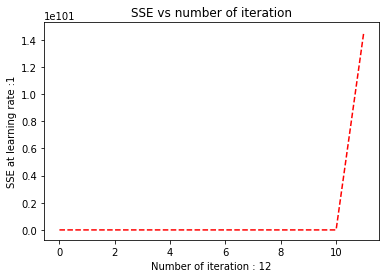

At learning rate: 1e-05
[[13.25799868]]


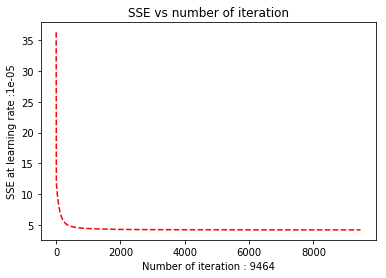

In [425]:
main_part1()

In [143]:
print("yes",3)

yes 3
